In [9]:
!pip install numpy
!pip install pandas


In [11]:
import numpy as np

In [15]:
import pandas as pd

# Replace 'your_dataset.csv' with the path to your dataset file
df = pd.read_csv('diabetes_prediction_dataset.csv')

# Display the first few rows of the dataframe
df.head()


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [19]:
missing_gender = df['gender'].isnull().sum()
print(missing_gender)

0


In [35]:
df['diabetes'].isnull().sum()

0

In [39]:
df['gender'].value_counts()

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

In [41]:
df['gender'].unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [43]:
# Apply one-hot encoding to the 'gender' column
df_new = pd.get_dummies(df, columns=['gender'], prefix='gender')

# Display the first few rows of the encoded dataset
df_new.head()

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,gender_Other
0,80.0,0,1,never,25.19,6.6,140,0,True,False,False
1,54.0,0,0,No Info,27.32,6.6,80,0,True,False,False
2,28.0,0,0,never,27.32,5.7,158,0,False,True,False
3,36.0,0,0,current,23.45,5.0,155,0,True,False,False
4,76.0,1,1,current,20.14,4.8,155,0,False,True,False


In [47]:
# Ensure the encoded columns are integers (0 and 1)
df_new[['gender_Female', 'gender_Male', 'gender_Other']] = df_new[['gender_Female', 'gender_Male', 'gender_Other']].astype(int)

# Display the first few rows to confirm
df_new.head()

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,gender_Other
0,80.0,0,1,never,25.19,6.6,140,0,1,0,0
1,54.0,0,0,No Info,27.32,6.6,80,0,1,0,0
2,28.0,0,0,never,27.32,5.7,158,0,0,1,0
3,36.0,0,0,current,23.45,5.0,155,0,1,0,0
4,76.0,1,1,current,20.14,4.8,155,0,0,1,0


In [49]:
df['smoking_history'].unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [51]:
data = df_new[df_new['smoking_history'] != 'No Info']

In [53]:
data


,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,gender_Other
0,80.0,0,1,never,25.19,6.6,140,0,1,0,0
2,28.0,0,0,never,27.32,5.7,158,0,0,1,0
3,36.0,0,0,current,23.45,5.0,155,0,1,0,0
4,76.0,1,1,current,20.14,4.8,155,0,0,1,0
5,20.0,0,0,never,27.32,6.6,85,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
99992,26.0,0,0,never,34.34,6.5,160,0,1,0,0
99993,40.0,0,0,never,40.69,3.5,155,0,1,0,0
99997,66.0,0,0,former,27.83,5.7,155,0,0,1,0
99998,24.0,0,0,never,35.42,4.0,100,0,1,0,0


In [61]:
data[data['smoking_history'] == 'never']

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,gender_Other
0,80.0,0,1,never,25.19,6.6,140,0,1,0,0
2,28.0,0,0,never,27.32,5.7,158,0,0,1,0
5,20.0,0,0,never,27.32,6.6,85,0,1,0,0
6,44.0,0,0,never,19.31,6.5,200,1,1,0,0
8,42.0,0,0,never,33.64,4.8,145,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
99986,63.0,0,0,never,29.01,4.8,145,0,1,0,0
99987,23.0,0,0,never,17.87,5.8,100,0,1,0,0
99992,26.0,0,0,never,34.34,6.5,160,0,1,0,0
99993,40.0,0,0,never,40.69,3.5,155,0,1,0,0


In [65]:
data['smoking_history'].value_counts().get('current', 0)

9286

In [67]:
data_update = pd.get_dummies(data, columns=['smoking_history'])

# Display the first few rows to verify
print(data_update.head())

    age  hypertension  heart_disease    bmi  HbA1c_level  blood_glucose_level  \
0  80.0             0              1  25.19          6.6                  140   
2  28.0             0              0  27.32          5.7                  158   
3  36.0             0              0  23.45          5.0                  155   
4  76.0             1              1  20.14          4.8                  155   
5  20.0             0              0  27.32          6.6                   85   

   diabetes  gender_Female  gender_Male  gender_Other  \
0         0              1            0             0   
2         0              0            1             0   
3         0              1            0             0   
4         0              0            1             0   
5         0              1            0             0   

   smoking_history_current  smoking_history_ever  smoking_history_former  \
0                    False                 False                   False   
2                 

In [69]:
data

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,gender_Other
0,80.0,0,1,never,25.19,6.6,140,0,1,0,0
2,28.0,0,0,never,27.32,5.7,158,0,0,1,0
3,36.0,0,0,current,23.45,5.0,155,0,1,0,0
4,76.0,1,1,current,20.14,4.8,155,0,0,1,0
5,20.0,0,0,never,27.32,6.6,85,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
99992,26.0,0,0,never,34.34,6.5,160,0,1,0,0
99993,40.0,0,0,never,40.69,3.5,155,0,1,0,0
99997,66.0,0,0,former,27.83,5.7,155,0,0,1,0
99998,24.0,0,0,never,35.42,4.0,100,0,1,0,0


In [71]:
data_update

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,gender_Other,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.0,0,1,25.19,6.6,140,0,1,0,0,False,False,False,True,False
2,28.0,0,0,27.32,5.7,158,0,0,1,0,False,False,False,True,False
3,36.0,0,0,23.45,5.0,155,0,1,0,0,True,False,False,False,False
4,76.0,1,1,20.14,4.8,155,0,0,1,0,True,False,False,False,False
5,20.0,0,0,27.32,6.6,85,0,1,0,0,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99992,26.0,0,0,34.34,6.5,160,0,1,0,0,False,False,False,True,False
99993,40.0,0,0,40.69,3.5,155,0,1,0,0,False,False,False,True,False
99997,66.0,0,0,27.83,5.7,155,0,0,1,0,False,False,True,False,False
99998,24.0,0,0,35.42,4.0,100,0,1,0,0,False,False,False,True,False


In [77]:
data_update[['smoking_history_current', 'smoking_history_ever', 'smoking_history_former', 
             'smoking_history_never', 'smoking_history_not current']] = data_update[['smoking_history_current', 'smoking_history_ever', 'smoking_history_former', 
                 'smoking_history_never', 'smoking_history_not current']].astype(int)

# Display the first few rows to verify
print(data_update.head())

    age  hypertension  heart_disease    bmi  HbA1c_level  blood_glucose_level  \
0  80.0             0              1  25.19          6.6                  140   
2  28.0             0              0  27.32          5.7                  158   
3  36.0             0              0  23.45          5.0                  155   
4  76.0             1              1  20.14          4.8                  155   
5  20.0             0              0  27.32          6.6                   85   

   diabetes  gender_Female  gender_Male  gender_Other  \
0         0              1            0             0   
2         0              0            1             0   
3         0              1            0             0   
4         0              0            1             0   
5         0              1            0             0   

   smoking_history_current  smoking_history_ever  smoking_history_former  \
0                        0                     0                       0   
2                 

In [79]:
data_update.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,gender_Other,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.0,0,1,25.19,6.6,140,0,1,0,0,0,0,0,1,0
2,28.0,0,0,27.32,5.7,158,0,0,1,0,0,0,0,1,0
3,36.0,0,0,23.45,5.0,155,0,1,0,0,1,0,0,0,0
4,76.0,1,1,20.14,4.8,155,0,0,1,0,1,0,0,0,0
5,20.0,0,0,27.32,6.6,85,0,1,0,0,0,0,0,1,0


In [81]:
data_update.to_csv('data_state.csv', index=False)

In [83]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler


# Select numerical columns
numerical_cols = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']



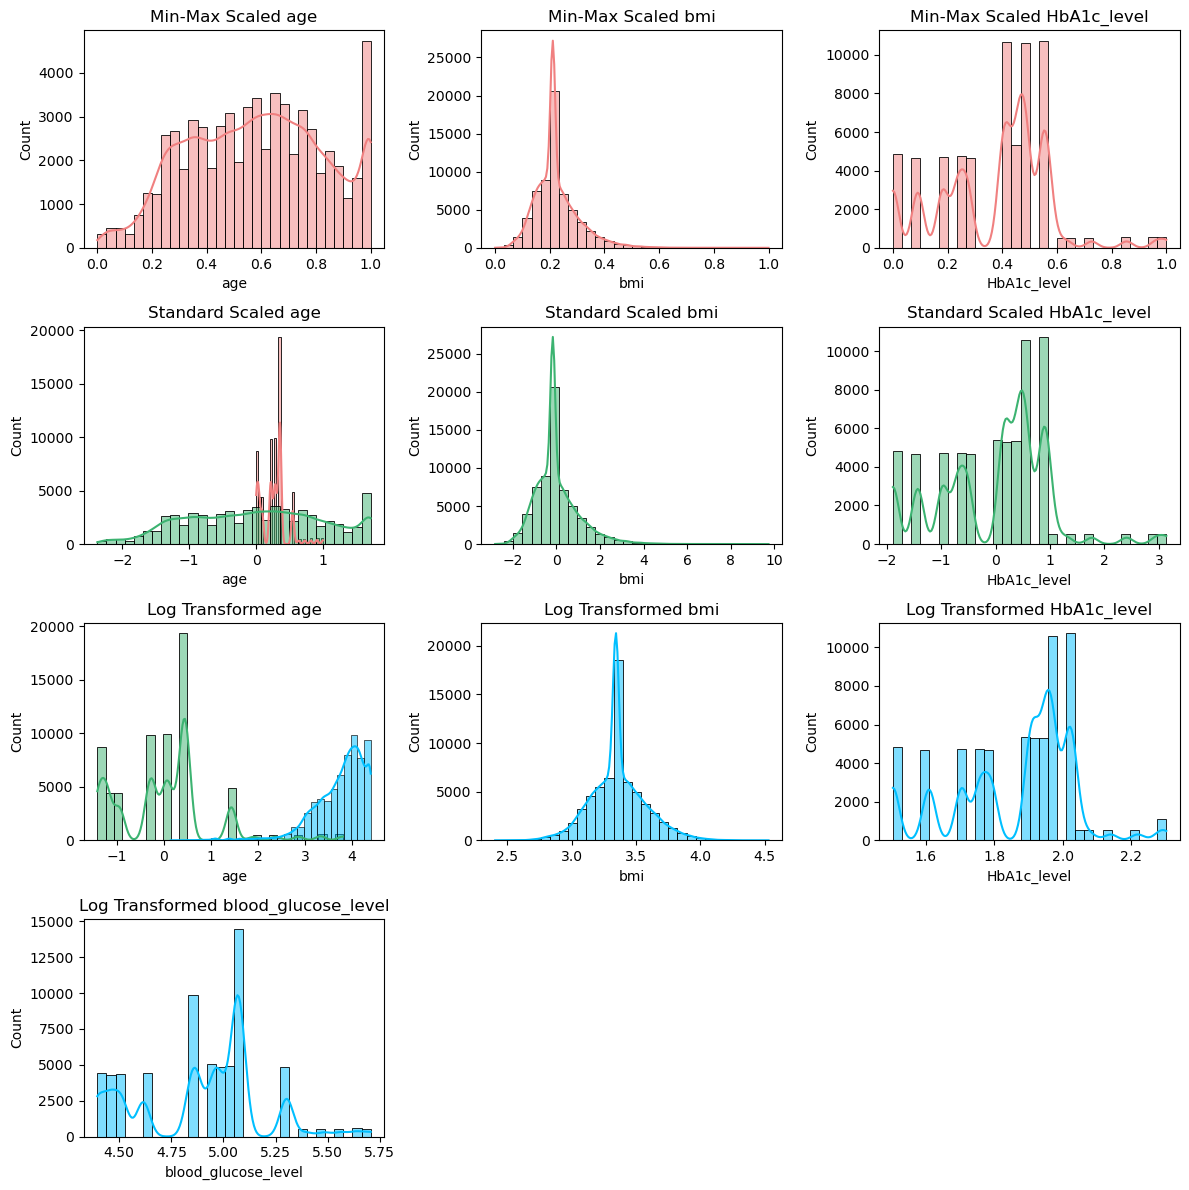

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Load your dataset
df = pd.read_csv('data_state.csv')

# Select numerical columns
numerical_cols = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

# Create new DataFrame to store transformed data
transformed_df = df[numerical_cols].copy()

# 1. Min-Max Scaling
min_max_scaler = MinMaxScaler()
transformed_df[numerical_cols] = min_max_scaler.fit_transform(df[numerical_cols])

# 2. Standard Scaling (Z-score normalization)
standard_scaler = StandardScaler()
standard_scaled_df = pd.DataFrame(standard_scaler.fit_transform(df[numerical_cols]), columns=numerical_cols)

# 3. Log Transformation (handling zero or negative values by adding a constant)
log_transformed_df = df[numerical_cols].apply(lambda x: np.log1p(x))  # log1p is log(1 + x)

# Plot the transformed data distributions
plt.figure(figsize=(12, 12))

# Min-Max Scaled Data
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 3, i)
    sns.histplot(transformed_df[col], kde=True, bins=30, color='lightcoral')
    plt.title(f'Min-Max Scaled {col}')
    plt.xlabel(col)

# Standard Scaled Data
for i, col in enumerate(numerical_cols, 4):
    plt.subplot(4, 3, i)
    sns.histplot(standard_scaled_df[col], kde=True, bins=30, color='mediumseagreen')
    plt.title(f'Standard Scaled {col}')
    plt.xlabel(col)

# Log Transformed Data
for i, col in enumerate(numerical_cols, 7):
    plt.subplot(4, 3, i)
    sns.histplot(log_transformed_df[col], kde=True, bins=30, color='deepskyblue')
    plt.title(f'Log Transformed {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()


In [89]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load your dataset
df = pd.read_csv('data_state.csv')

# Select numerical columns
numerical_cols = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

# Standard Scaling (Z-score normalization)
standard_scaler = StandardScaler()
df[numerical_cols] = standard_scaler.fit_transform(df[numerical_cols])

# Verify the standardization
df.describe()


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,gender_Other,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
count,6.418400e+04,64184.000000,64184.000000,6.418400e+04,6.418400e+04,6.418400e+04,64184.000000,64184.000000,64184.000000,64184.000000,64184.000000,64184.000000,64184.000000,64184.000000,64184.000000
mean,-2.811882e-16,0.097890,0.047037,6.730805e-17,-2.851736e-16,1.000764e-16,0.109778,0.605322,0.394491,0.000187,0.144678,0.062383,0.145706,0.546787,0.100446
std,1.000008e+00,0.297169,0.211719,1.000008e+00,1.000008e+00,1.000008e+00,0.312615,0.488785,0.488745,0.013672,0.351778,0.241852,0.352814,0.497810,0.300596
min,-2.373781e+00,0.000000,0.000000,-2.815178e+00,-1.884309e+00,-1.414145e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.954947e-01,0.000000,0.000000,-5.868682e-01,-6.976479e-01,-9.398241e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.333080e-02,0.000000,0.000000,-1.694437e-01,2.151683e-01,8.817024e-03,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,7.398031e-01,0.000000,0.000000,4.106536e-01,5.802948e-01,4.594216e-01,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.712158e+00,1.000000,1.000000,9.729042e+00,3.136180e+00,3.803382e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [135]:
# Create interaction features
df['hypertension_heart_disease'] = df['hypertension'] * df['heart_disease']
df['diabetes_age'] = df['diabetes'] * df['age']

# Display the first few rows to verify
df.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,gender_Other,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current,hypertension_heart_disease,diabetes_age,age_group,bmi_category
0,1.712158,0,1,-0.496324,0.945421,0.008817,0,1,0,0,0,0,0,1,0,0,0.0,1,NaN
1,-0.949025,0,0,-0.169444,0.123887,0.435706,0,0,1,0,0,0,0,1,0,0,-0.0,NaN,NaN
2,-0.539612,0,0,-0.763353,-0.515085,0.364557,0,1,0,0,1,0,0,0,0,0,-0.0,NaN,NaN
3,1.507452,1,1,-1.271322,-0.697648,0.364557,0,0,1,0,1,0,0,0,0,1,0.0,1,NaN
4,-1.358437,0,0,-0.169444,0.945421,-1.295565,0,1,0,0,0,0,0,1,0,0,-0.0,NaN,NaN


In [137]:
df.drop(['age_group', 'bmi_category'], axis=1, inplace=True) # Display the first few rows to verify df.head()

In [139]:
df

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,gender_Other,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current,hypertension_heart_disease,diabetes_age
0,1.712158,0,1,-0.496324,0.945421,0.008817,0,1,0,0,0,0,0,1,0,0,0.0
1,-0.949025,0,0,-0.169444,0.123887,0.435706,0,0,1,0,0,0,0,1,0,0,-0.0
2,-0.539612,0,0,-0.763353,-0.515085,0.364557,0,1,0,0,1,0,0,0,0,0,-0.0
3,1.507452,1,1,-1.271322,-0.697648,0.364557,0,0,1,0,1,0,0,0,0,1,0.0
4,-1.358437,0,0,-0.169444,0.945421,-1.295565,0,1,0,0,0,0,0,1,0,0,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64179,-1.051378,0,0,0.907880,0.854140,0.483138,0,1,0,0,0,0,0,1,0,0,-0.0
64180,-0.334905,0,0,1.882382,-1.884309,0.364557,0,1,0,0,0,0,0,1,0,0,-0.0
64181,0.995686,0,0,-0.091177,0.123887,0.364557,0,0,1,0,0,0,1,0,0,0,0.0
64182,-1.153731,0,0,1.073622,-1.427901,-0.939824,0,1,0,0,0,0,0,1,0,0,-0.0


In [141]:
# Export dataframe to CSV
df.to_csv('data_model.csv', index=False)
